In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import quandl
import os
import warnings
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from graham import *

warnings.filterwarnings('ignore')
quandl.ApiConfig.api_key = os.getenv('QUANDL_APY_KEY')

In [2]:
list_sp500 = get_sp500_symbols()

In [15]:
from collections import defaultdict

dic = defaultdict(list)
dr = pd.date_range('2008-01-01', '2019-01-01', freq='Y')

fname = os.path.join(os.getcwd(), 'data_defensive', 'sf1.csv')
df_all = pd.read_csv(fname, parse_dates=['calendardate', 'datekey'])
    
for date in dr:
    list_passing_companies = criteria_defensive_investor_list(list_sp500, all_data=df_all, 
                                                              relax_current_ratio=False, dt=date, 
                                                              show_progress=True)
    print(f"{date:%Y-%m-%d} companies: {list_passing_companies}")
    dic[date] = list_passing_companies


2008-12-31 companies: ['ALB', 'BDX', 'CTAS', 'XRAY', 'BEN', 'GWW', 'HRS', 'HP', 'ITW', 'LB', 'MDT', 'NKE', 'NUE', 'PFE', 'SYK', 'TIF', 'TSS']



2009-12-31 companies: ['ALB', 'BDX', 'CTAS', 'CAG', 'XRAY', 'EXPD', 'FAST', 'BEN', 'GWW', 'HOG', 'HRL', 'IFF', 'MDT', 'NKE', 'NUE', 'PNR', 'ROK', 'SNA', 'SYK', 'TIF', 'TSS']



2010-12-31 companies: ['MMM', 'ALB', 'BDX', 'BMY', 'CTAS', 'XRAY', 'EXPD', 'FAST', 'BEN', 'GWW', 'HP', 'ITW', 'IFF', 'MLM', 'NKE', 'PNR', 'ROK', 'SNA', 'SYK', 'TFX', 'TIF', 'TSS']



2011-12-31 companies: ['MMM', 'ALB', 'ADM', 'BDX', 'CTAS', 'XRAY', 'EXPD', 'FAST', 'BEN', 'GWW', 'HP', 'HRL', 'IFF', 'NKE', 'PFE', 'SNA', 'SYK', 'TFX', 'TIF', 'TSS']



2012-12-31 companies: ['MMM', 'ALB', 'AOS', 'BDX', 'CTAS', 'EXPD', 'FAST', 'GPS', 'HP', 'HRL', 'ITW', 'INTC', 'IFF', 'JNJ', 'NKE', 'JWN', 'ROK', 'ROP', 'SNA', 'SYK', 'TFX', 'TIF']



2013-12-31 companies: ['MMM', 'ABT', 'ALB', 'AOS', 'BDX', 'CTAS', 'DWDP', 'EL', 'EXPD', 'FAST', 'GWW', 'HP', 'HFC', 'HRL', 'ITW', 'INTC', 'IFF', 'MAT', 'MDT', 'MCO', 'NKE', 'JWN', 'PCAR', 'ROK', 'SNA', 'SYK', 'TXN', 'TIF', 'TSS']



2014-12-31 companies: ['ABT', 'ALB', 'AOS', 'BDX', 'CTAS', 'CMI', 'DHR', 'DOV', 'DWDP', 'EL', 'EXPD', 'FAST', 'GWW', 'HP', 'HFC', 'HRL', 'INTC', 'IFF', 'JNJ', 'MAT', 'MDT', 'MCO', 'NKE', 'JWN', 'PFE', 'ROK', 'ROP', 'SNA', 'SYK', 'TXN', 'TIF', 'TSS', 'VFC', 'VZ']



2015-12-31 companies: ['ALB', 'AOS', 'CTAS', 'CMI', 'DWDP', 'EL', 'EXPD', 'FAST', 'GWW', 'HAS', 'HP', 'HFC', 'ITW', 'IFF', 'SJM', 'JNJ', 'MAT', 'MDT', 'MCO', 'NKE', 'PH', 'PFE', 'PVH', 'ROK', 'ROP', 'SNA', 'SYK', 'TXN', 'TIF', 'TSS', 'VFC']



2016-12-31 companies: ['AOS', 'BAX', 'CMI', 'XRAY', 'DWDP', 'EXPD', 'FAST', 'HAS', 'ITW', 'INTC', 'JNJ', 'LB', 'MCD', 'MDT', 'MCO', 'NKE', 'PCAR', 'PH', 'ROK', 'ROP', 'SNA', 'SYK', 'TXN', 'TIF', 'TSS', 'VFC']



2017-12-31 companies: ['APD', 'ALB', 'AME', 'AOS', 'BAX', 'BDX', 'XRAY', 'EXPD', 'FAST', 'ITW', 'JNJ', 'NKE', 'SYK', 'TXN', 'TIF', 'TSS', 'VFC']



2018-12-31 companies: ['APD', 'ALB', 'AOS', 'BAX', 'CTAS', 'COO', 'EXPD', 'FAST', 'GWW', 'HAS', 'ITW', 'IFF', 'MLM', 'NKE', 'SYK', 'TXN', 'TIF']


In [43]:
get_data('UFPI', dt=datetime(2010, 12, 31))

,calendardate,datekey,revenueusd,currentratio,eps,dps,bvps,price
107134,1997-12-31,1998-03-27,1.066300e+09,2.323,0.323,0.022,2.204,5.500
107135,1998-12-31,1999-03-25,1.238907e+09,2.218,0.443,0.023,3.083,6.730
107136,1999-12-31,2000-03-24,1.435055e+09,2.363,0.507,0.025,3.515,4.417
107137,2000-12-31,2001-03-28,1.389443e+09,2.503,0.507,0.027,3.941,5.000
107138,2001-12-31,2002-03-27,1.530353e+09,2.119,0.560,0.028,3.889,8.213
107139,2002-12-31,2003-03-14,1.639899e+09,2.702,0.680,0.030,4.940,5.077
107140,2003-12-31,2004-03-11,1.898830e+09,2.342,0.753,0.032,5.704,10.507
107141,2004-12-31,2005-03-10,2.453281e+09,2.211,0.900,0.033,6.577,12.780
107142,2005-12-31,2006-03-08,2.691522e+09,2.460,1.223,0.035,7.772,19.963
107144,2006-12-31,2007-02-27,2.664572e+09,2.472,1.243,0.037,9.071,17.180


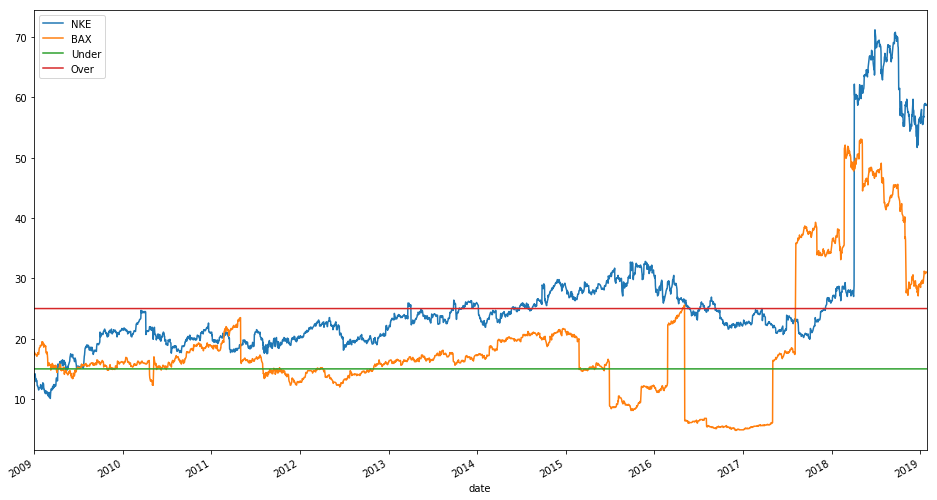

In [47]:
list_pes = ['NKE', 'BAX']
def get_daily_pes(ticker, start_date, end_date=datetime.today()):
    result = quandl.get_table('SHARADAR/DAILY', ticker=ticker, qopts={"columns":["date", "pe"]}, 
                          date={'gte': start_date, 'lte': end_date})
    result.set_index('date', inplace=True)
    result.sort_index(inplace=True)
    result.rename(columns={'pe': ticker}, inplace=True)
    return result

list_companies_pes = []
for ticker in list_pes:
    list_companies_pes.append(get_daily_pes(ticker, datetime(2008, 12, 31)))
    
result2 = pd.concat(list_companies_pes, axis=1)
result2['Under'] = 15
result2['Over'] = 25
result2.plot(figsize=(16, 9)) #, ylim=(0, 100))